In [1]:
from carlo_utils import get_data
import pandas as pd
import numpy as np
from src.models.decisiontrees.lightgbm import LGBM1
from tqdm import tqdm
import warnings
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('data/datasets2025/historical_metering_data_IT.csv')
all_cols = dataframe.columns
all_cols = all_cols.drop('DATETIME')
all_indexes = all_cols.str.split('IT_', expand=False)
all_indexes = [int(index) for name,index in all_indexes]


In [3]:
all_indexes =all_indexes[:len(all_indexes)//3]

In [4]:
preds_august = []
preds_july = []
true_july = []

cutoff = pd.to_datetime('2024-06-01')
cutoff2 = pd.to_datetime('2024-07-01')


In [5]:
for index in tqdm(all_indexes):
    
    all_data = get_data(
        country='IT',
        customer_index = [index],
        demand=[0]+[i for i in range(8730,8760)]+[i for i in range(0,800,4)],
        temp=[0, 1,2,3,4,5,6, 24, 24*7, 24*365],
        spv=[0,2,3,4,5,6, 1, 24, 24*7, 24*365],
        forecast_shifts=[31],
        rollout_values=[i for i in range(0,24*31,4)],
        moving_average=[24, 24*7, 24*30,24*90,24*365],)
    
    

    train_data = all_data[all_data.index < cutoff]
    test_data = all_data[all_data.index >= cutoff]
    forecast_data = test_data[test_data.index < cutoff2]

    


    forecast_columns = train_data.columns[train_data.columns.str.contains('forecast')]
    X_train = train_data.drop(columns=forecast_columns)
    print(X_train.shape)
    y_train = train_data[forecast_columns]
    model = LGBM1(
                  )
    model.fit(X_train, y_train)

    # Predicting for July
    test_data_2 = test_data[test_data.index < cutoff2]
    X_test = test_data_2.drop(columns=forecast_columns)
    y_test = test_data_2[forecast_columns]
    y_pred = model.predict(X_test)
    preds_july.append(y_pred)
    true_july.append(y_test)
    # Predicting for August
    X_forecast = forecast_data.drop(columns=forecast_columns)

    y_forecast = model.predict(X_forecast)

    preds_august.append(y_forecast)

  0%|          | 0/565 [00:00<?, ?it/s]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405113
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005054


  0%|          | 1/565 [00:07<1:07:42,  7.20s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412425
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.003241


  0%|          | 2/565 [00:14<1:07:37,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448509
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.085049


  1%|          | 3/565 [00:21<1:09:06,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.148465


  1%|          | 4/565 [00:29<1:09:26,  7.43s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410739
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.005297


  1%|          | 5/565 [00:36<1:08:08,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494621
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.111183


  1%|          | 6/565 [00:44<1:09:31,  7.46s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437658
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.033406


  1%|          | 7/565 [00:51<1:08:04,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 473719
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.039079


  1%|▏         | 8/565 [00:58<1:08:18,  7.36s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469010
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.003918


  2%|▏         | 9/565 [01:05<1:07:24,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002853


  2%|▏         | 10/565 [01:12<1:05:52,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411793
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.012310


  2%|▏         | 11/565 [01:19<1:04:58,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 467034
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.000760


  2%|▏         | 12/565 [01:26<1:05:15,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.006181


  2%|▏         | 13/565 [01:33<1:04:06,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437163
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.040150


  2%|▏         | 14/565 [01:41<1:05:48,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431397
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.024096


  3%|▎         | 15/565 [01:48<1:07:17,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414234
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.012343


  3%|▎         | 16/565 [01:55<1:05:37,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 374665
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.010009


  3%|▎         | 17/565 [02:02<1:04:23,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438995
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.029722


  3%|▎         | 18/565 [02:09<1:04:07,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441149
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.034047


  3%|▎         | 19/565 [02:16<1:03:43,  7.00s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.175182


  4%|▎         | 20/565 [02:23<1:04:38,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401363
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001109


  4%|▎         | 21/565 [02:30<1:03:31,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423027
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.016193


  4%|▍         | 22/565 [02:37<1:04:01,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358118
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.006540


  4%|▍         | 23/565 [02:44<1:03:16,  7.00s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 399080
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003154


  4%|▍         | 24/565 [02:51<1:02:57,  6.98s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 375890
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000309


  4%|▍         | 25/565 [02:58<1:02:02,  6.89s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431595
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.019051


  5%|▍         | 26/565 [03:04<1:01:21,  6.83s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423837
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.027327


  5%|▍         | 27/565 [03:12<1:02:43,  7.00s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410444
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.013510


  5%|▍         | 28/565 [03:19<1:02:45,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405367
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.007994


  5%|▌         | 29/565 [03:26<1:03:04,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415540
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.006097


  5%|▌         | 30/565 [03:33<1:02:26,  7.00s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403240
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.008384


  5%|▌         | 31/565 [03:40<1:01:49,  6.95s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411697
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.006653


  6%|▌         | 32/565 [03:46<1:01:28,  6.92s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.063907


  6%|▌         | 33/565 [03:54<1:03:40,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.489168


  6%|▌         | 34/565 [04:02<1:03:54,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 419879
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.009040


  6%|▌         | 35/565 [04:08<1:02:26,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412768
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005192


  6%|▋         | 36/565 [04:15<1:01:59,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515935
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.280194


  7%|▋         | 37/565 [04:23<1:03:23,  7.20s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.092138


  7%|▋         | 38/565 [04:30<1:04:06,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.427339


  7%|▋         | 39/565 [04:38<1:04:25,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451371
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.190438


  7%|▋         | 40/565 [04:45<1:04:41,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.452289


  7%|▋         | 41/565 [04:52<1:04:02,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 501246
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.104078


  7%|▋         | 42/565 [05:00<1:04:45,  7.43s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433492
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.070980


  8%|▊         | 43/565 [05:07<1:04:08,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442501
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.072427


  8%|▊         | 44/565 [05:14<1:03:06,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.225986


  8%|▊         | 45/565 [05:22<1:02:43,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.249646


  8%|▊         | 46/565 [05:29<1:03:01,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

  8%|▊         | 47/565 [05:34<57:02,  6.61s/it]  

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 399133
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000980


  8%|▊         | 48/565 [05:41<56:51,  6.60s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405683
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002806


  9%|▊         | 49/565 [05:47<57:04,  6.64s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.205799


  9%|▉         | 50/565 [05:55<59:30,  6.93s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418563
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.010002


  9%|▉         | 51/565 [06:02<59:48,  6.98s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.258477


  9%|▉         | 52/565 [06:10<1:01:06,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.264748


  9%|▉         | 53/565 [06:17<1:02:28,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 486707
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.028372


 10%|▉         | 54/565 [06:25<1:02:40,  7.36s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422699
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.015999


 10%|▉         | 55/565 [06:32<1:01:12,  7.20s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447736
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.160257


 10%|▉         | 56/565 [06:39<1:00:48,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434959
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.055790


 10%|█         | 57/565 [06:46<1:00:29,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.154855


 10%|█         | 58/565 [06:53<1:00:44,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.060942


 10%|█         | 59/565 [07:00<59:50,  7.10s/it]  

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443393
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.107926


 11%|█         | 60/565 [07:07<59:36,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.232288


 11%|█         | 61/565 [07:15<1:01:44,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.336601


 11%|█         | 62/565 [07:23<1:02:19,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.091474


 11%|█         | 63/565 [07:30<1:02:26,  7.46s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400311
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001027


 11%|█▏        | 64/565 [07:37<1:00:24,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 496782
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.069227


 12%|█▏        | 65/565 [07:45<1:01:39,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443627
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.058343


 12%|█▏        | 66/565 [07:52<1:00:34,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485436
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.045708


 12%|█▏        | 67/565 [07:59<1:01:19,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.326504


 12%|█▏        | 68/565 [08:07<1:01:17,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 419904
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.007329


 12%|█▏        | 69/565 [08:13<59:38,  7.21s/it]  

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515279
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.160237


 12%|█▏        | 70/565 [08:21<1:00:46,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405729
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.001218


 13%|█▎        | 71/565 [08:28<1:00:15,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430446
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.035260


 13%|█▎        | 72/565 [08:35<59:09,  7.20s/it]  

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.334084


 13%|█▎        | 73/565 [08:43<59:22,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403071
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1854
[LightGBM] [Info] Start training from score 0.000130


 13%|█▎        | 74/565 [08:49<58:21,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 488832
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.061561


 13%|█▎        | 75/565 [08:57<58:30,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 408314
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003393


 13%|█▎        | 76/565 [09:04<57:39,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439352
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.056560


 14%|█▎        | 77/565 [09:11<57:19,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422394
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.015407


 14%|█▍        | 78/565 [09:18<57:46,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420423
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.004305


 14%|█▍        | 79/565 [09:25<57:38,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.376887


 14%|█▍        | 80/565 [09:33<58:45,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.770668


 14%|█▍        | 81/565 [09:40<59:47,  7.41s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.199794


 15%|█▍        | 82/565 [09:48<59:36,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.720601


 15%|█▍        | 83/565 [09:55<59:55,  7.46s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435543
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.015144


 15%|█▍        | 84/565 [10:02<58:21,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400125
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004642


 15%|█▌        | 85/565 [10:09<56:34,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365056
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1806
[LightGBM] [Info] Start training from score 0.008325


 15%|█▌        | 86/565 [10:15<54:43,  6.86s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.241226


 15%|█▌        | 87/565 [10:23<56:11,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436747
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.045995


 16%|█▌        | 88/565 [10:30<55:52,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400311
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001088


 16%|█▌        | 89/565 [10:36<55:01,  6.94s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.199649


 16%|█▌        | 90/565 [10:44<56:31,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438153
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.059903


 16%|█▌        | 91/565 [10:51<56:18,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411565
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.031737


 16%|█▋        | 92/565 [10:59<57:12,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443225
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.068007


 16%|█▋        | 93/565 [11:06<56:30,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 398265
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001236


 17%|█▋        | 94/565 [11:12<55:15,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400766
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001163


 17%|█▋        | 95/565 [11:19<54:25,  6.95s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.442809


 17%|█▋        | 96/565 [11:26<55:15,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 408123
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003285


 17%|█▋        | 97/565 [11:33<54:32,  6.99s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407193
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003695


 17%|█▋        | 98/565 [11:40<54:12,  6.96s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403287
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004696


 18%|█▊        | 99/565 [11:47<53:29,  6.89s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.229896


 18%|█▊        | 100/565 [11:54<54:02,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421353
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.020428


 18%|█▊        | 101/565 [12:02<56:00,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.413462


 18%|█▊        | 102/565 [12:09<56:14,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 3.189465


 18%|█▊        | 103/565 [12:17<56:16,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405310
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002368


 18%|█▊        | 104/565 [12:24<55:13,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414439
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014614


 19%|█▊        | 105/565 [12:30<54:03,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 2.262784


 19%|█▉        | 106/565 [12:38<55:34,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.450002


 19%|█▉        | 107/565 [12:46<56:57,  7.46s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 426375
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.022087


 19%|█▉        | 108/565 [12:53<55:50,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424860
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.024542


 19%|█▉        | 109/565 [13:00<54:31,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406199
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000538


 19%|█▉        | 110/565 [13:07<53:39,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 488468
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.075043


 20%|█▉        | 111/565 [13:14<55:12,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442858
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.050445


 20%|█▉        | 112/565 [13:21<54:32,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414285
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.007292


 20%|██        | 113/565 [13:29<55:16,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407485
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002295


 20%|██        | 114/565 [13:36<53:34,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422097
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.016495


 20%|██        | 115/565 [13:43<54:26,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405357
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.007343


 21%|██        | 116/565 [13:51<54:26,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418005
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.015165


 21%|██        | 117/565 [13:58<55:27,  7.43s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 398883
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.002046


 21%|██        | 118/565 [14:05<54:39,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413169
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.008018


 21%|██        | 119/565 [14:13<54:50,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 21%|██        | 120/565 [14:18<49:35,  6.69s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 481344
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.029063


 21%|██▏       | 121/565 [14:25<50:54,  6.88s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 419307
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.011521


 22%|██▏       | 122/565 [14:33<51:44,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 3.754302


 22%|██▏       | 123/565 [14:41<53:27,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442910
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.074652


 22%|██▏       | 124/565 [14:48<52:53,  7.20s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Info] Start training from score 0.000106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 22%|██▏       | 125/565 [14:54<50:40,  6.91s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368706
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.009352


 22%|██▏       | 126/565 [15:02<52:21,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.474865


 22%|██▏       | 127/565 [15:09<52:23,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441255
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.082243


 23%|██▎       | 128/565 [15:16<51:45,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 352647
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.001314


 23%|██▎       | 129/565 [15:22<50:56,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424329
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.043551


 23%|██▎       | 130/565 [15:30<50:55,  7.02s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414068
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.017123


 23%|██▎       | 131/565 [15:37<51:58,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401985
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001301


 23%|██▎       | 132/565 [15:44<50:53,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.414079


 24%|██▎       | 133/565 [15:51<51:19,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424617
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.007129


 24%|██▎       | 134/565 [15:58<50:57,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443369
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.307035


 24%|██▍       | 135/565 [16:05<50:41,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 4.857726


 24%|██▍       | 136/565 [16:12<50:49,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432271
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.059358


 24%|██▍       | 137/565 [16:20<52:04,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443835
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.180983


 24%|██▍       | 138/565 [16:28<52:41,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417609
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.024757


 25%|██▍       | 139/565 [16:35<52:48,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348969
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000048


 25%|██▍       | 140/565 [16:42<50:50,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349670
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000302


 25%|██▍       | 141/565 [16:48<49:21,  6.98s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350911
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000954


 25%|██▌       | 142/565 [16:55<48:12,  6.84s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349168
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000086


 25%|██▌       | 143/565 [17:01<47:32,  6.76s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349353
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000094


 25%|██▌       | 144/565 [17:08<47:04,  6.71s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349927
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000511


 26%|██▌       | 145/565 [17:15<46:41,  6.67s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348776
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000029


 26%|██▌       | 146/565 [17:21<46:20,  6.64s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350800
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001132


 26%|██▌       | 147/565 [17:28<46:05,  6.62s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350041
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000300


 26%|██▌       | 148/565 [17:34<45:58,  6.61s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358730
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.001497


 26%|██▋       | 149/565 [17:42<47:00,  6.78s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349609
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000170


 27%|██▋       | 150/565 [17:48<46:32,  6.73s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349855
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000119


 27%|██▋       | 151/565 [17:55<46:11,  6.70s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350041
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000459


 27%|██▋       | 152/565 [18:01<45:44,  6.65s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 361905
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.003203


 27%|██▋       | 153/565 [18:09<46:50,  6.82s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.973195


 27%|██▋       | 154/565 [18:16<48:23,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 426165
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.013969


 27%|██▋       | 155/565 [18:23<48:04,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 395014
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002813


 28%|██▊       | 156/565 [18:30<47:11,  6.92s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439767
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.049963


 28%|██▊       | 157/565 [18:37<47:24,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.176753


 28%|██▊       | 158/565 [18:44<47:39,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387227
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001436


 28%|██▊       | 159/565 [18:51<46:59,  6.94s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409593
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004799


 28%|██▊       | 160/565 [18:58<46:44,  6.92s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442412
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.077299


 28%|██▊       | 161/565 [19:05<46:54,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 440455
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.030011


 29%|██▊       | 162/565 [19:12<46:30,  6.93s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.112705


 29%|██▉       | 163/565 [19:19<46:28,  6.94s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414797
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005806


 29%|██▉       | 164/565 [19:25<45:58,  6.88s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508390
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.318362


 29%|██▉       | 165/565 [19:33<47:53,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.538489


 29%|██▉       | 166/565 [19:41<48:47,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442049
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.052570


 30%|██▉       | 167/565 [19:48<47:57,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434559
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.044149


 30%|██▉       | 168/565 [19:55<47:44,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.281284


 30%|██▉       | 169/565 [20:03<48:21,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 426933
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.049793


 30%|███       | 170/565 [20:10<48:20,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479299
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.027297


 30%|███       | 171/565 [20:18<48:35,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456900
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.004022


 30%|███       | 172/565 [20:25<48:16,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.161030


 31%|███       | 173/565 [20:33<49:06,  7.52s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506969
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.098697


 31%|███       | 174/565 [20:40<49:28,  7.59s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 484878
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.037313


 31%|███       | 175/565 [20:48<49:34,  7.63s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 501060
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.076113


 31%|███       | 176/565 [20:56<49:07,  7.58s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424143
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.029690


 31%|███▏      | 177/565 [21:03<47:47,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392268
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003677


 32%|███▏      | 178/565 [21:09<46:26,  7.20s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443679
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.147631


 32%|███▏      | 179/565 [21:16<45:56,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.122681


 32%|███▏      | 180/565 [21:24<46:56,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422283
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.015351


 32%|███▏      | 181/565 [21:31<46:13,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414442
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004547


 32%|███▏      | 182/565 [21:38<45:19,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.448794


 32%|███▏      | 183/565 [21:45<45:30,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417447
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.022773


 33%|███▎      | 184/565 [21:52<45:29,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.474991


 33%|███▎      | 185/565 [21:59<44:46,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.278594


 33%|███▎      | 186/565 [22:07<45:43,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510361
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.086079


 33%|███▎      | 187/565 [22:14<45:38,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515011
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.206838


 33%|███▎      | 188/565 [22:22<46:17,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.443114


 33%|███▎      | 189/565 [22:29<45:49,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.357595


 34%|███▎      | 190/565 [22:37<46:17,  7.41s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 34%|███▍      | 191/565 [22:42<41:49,  6.71s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.300912


 34%|███▍      | 192/565 [22:49<43:22,  6.98s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443859
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.055063


 34%|███▍      | 193/565 [22:56<43:33,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415903
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002634


 34%|███▍      | 194/565 [23:03<42:54,  6.94s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.657823


 35%|███▍      | 195/565 [23:11<43:56,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.894557


 35%|███▍      | 196/565 [23:18<44:41,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 2.127817


 35%|███▍      | 197/565 [23:26<44:40,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446463
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.038208


 35%|███▌      | 198/565 [23:33<44:33,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442711
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.049133


 35%|███▌      | 199/565 [23:40<43:52,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.259738


 35%|███▌      | 200/565 [23:47<43:31,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444002
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.181618


 36%|███▌      | 201/565 [23:54<43:08,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446649
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.086960


 36%|███▌      | 202/565 [24:02<44:08,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439149
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.029518


 36%|███▌      | 203/565 [24:09<43:26,  7.20s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509830
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.103010


 36%|███▌      | 204/565 [24:16<43:12,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.284683


 36%|███▋      | 205/565 [24:23<43:19,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437292
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.077015


 36%|███▋      | 206/565 [24:30<42:51,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512289
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.252723


 37%|███▋      | 207/565 [24:38<43:09,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438879
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.026193


 37%|███▋      | 208/565 [24:45<42:37,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444013
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.077809


 37%|███▋      | 209/565 [24:52<42:40,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.888718


 37%|███▋      | 210/565 [25:00<43:41,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434286
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.052135


 37%|███▋      | 211/565 [25:07<43:17,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406635
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004004


 38%|███▊      | 212/565 [25:14<42:11,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.471194


 38%|███▊      | 213/565 [25:21<42:41,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.231913


 38%|███▊      | 214/565 [25:29<43:09,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420957
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.026735


 38%|███▊      | 215/565 [25:36<42:22,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347904
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000861


 38%|███▊      | 216/565 [25:42<41:06,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508501
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.115308


 38%|███▊      | 217/565 [25:50<41:10,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.303064


 39%|███▊      | 218/565 [25:57<41:46,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.018669


 39%|███▉      | 219/565 [26:04<41:02,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443580
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.311261


 39%|███▉      | 220/565 [26:11<40:45,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427670
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.038986


 39%|███▉      | 221/565 [26:18<40:20,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.353001


 39%|███▉      | 222/565 [26:25<41:05,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443007
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.092945


 39%|███▉      | 223/565 [26:33<41:23,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 2.334887


 40%|███▉      | 224/565 [26:40<41:36,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 408123
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004951


 40%|███▉      | 225/565 [26:47<40:32,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432339
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014857


 40%|████      | 226/565 [26:54<39:59,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439445
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.032543


 40%|████      | 227/565 [27:01<39:41,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.873769


 40%|████      | 228/565 [27:08<40:05,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446995
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.176609


 41%|████      | 229/565 [27:16<40:08,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 399877
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.006543


 41%|████      | 230/565 [27:22<39:31,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.363270


 41%|████      | 231/565 [27:30<40:00,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515861
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.504255


 41%|████      | 232/565 [27:38<40:54,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443675
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.214612


 41%|████      | 233/565 [27:45<40:00,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.351017


 41%|████▏     | 234/565 [27:52<40:26,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.324828


 42%|████▏     | 235/565 [28:00<40:43,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.246753


 42%|████▏     | 236/565 [28:07<41:12,  7.52s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.195039


 42%|████▏     | 237/565 [28:15<41:00,  7.50s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442170
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.042659


 42%|████▏     | 238/565 [28:22<40:05,  7.36s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.289818


 42%|████▏     | 239/565 [28:29<39:37,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.431259


 42%|████▏     | 240/565 [28:37<39:59,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432176
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.022741


 43%|████▎     | 241/565 [28:44<39:28,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424131
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.020743


 43%|████▎     | 242/565 [28:51<38:53,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443815
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.123818


 43%|████▎     | 243/565 [28:58<38:19,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485963
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.055709


 43%|████▎     | 244/565 [29:05<38:48,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 507756
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.085630


 43%|████▎     | 245/565 [29:13<38:40,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431945
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.038015


 44%|████▎     | 246/565 [29:20<38:06,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.485686


 44%|████▎     | 247/565 [29:27<39:09,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.122248


 44%|████▍     | 248/565 [29:35<39:28,  7.47s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443143
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.067057


 44%|████▍     | 249/565 [29:42<38:37,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.310609


 44%|████▍     | 250/565 [29:50<38:48,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.327310


 44%|████▍     | 251/565 [29:57<38:52,  7.43s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 472975
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.008769


 45%|████▍     | 252/565 [30:05<38:53,  7.45s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.380597


 45%|████▍     | 253/565 [30:12<38:51,  7.47s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432159
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.133418


 45%|████▍     | 254/565 [30:19<38:13,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.326312


 45%|████▌     | 255/565 [30:27<38:25,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511663
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.174338


 45%|████▌     | 256/565 [30:35<38:47,  7.53s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.382341


 45%|████▌     | 257/565 [30:42<38:35,  7.52s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413889
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.011626


 46%|████▌     | 258/565 [30:49<37:20,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.328420


 46%|████▌     | 259/565 [30:56<37:37,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.026486


 46%|████▌     | 260/565 [31:04<37:56,  7.46s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443911
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.116273


 46%|████▌     | 261/565 [31:11<36:58,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397149
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.010163


 46%|████▋     | 262/565 [31:18<36:04,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409821
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000908


 47%|████▋     | 263/565 [31:25<36:10,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 399939
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000945


 47%|████▋     | 264/565 [31:32<35:17,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360813
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001985


 47%|████▋     | 265/565 [31:38<34:18,  6.86s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435405
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.023913


 47%|████▋     | 266/565 [31:45<33:58,  6.82s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410192
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.007995


 47%|████▋     | 267/565 [31:52<33:47,  6.80s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.123164


 47%|████▋     | 268/565 [31:59<34:38,  7.00s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402915
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002028


 48%|████▊     | 269/565 [32:06<33:50,  6.86s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 513028
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.095681


 48%|████▊     | 270/565 [32:13<34:44,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 496597
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.122660


 48%|████▊     | 271/565 [32:21<35:03,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.854457


 48%|████▊     | 272/565 [32:28<35:45,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396642
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000285


 48%|████▊     | 273/565 [32:35<34:42,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450541
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.037519


 48%|████▊     | 274/565 [32:42<34:13,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451659
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.154378


 49%|████▊     | 275/565 [32:49<34:22,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.147397


 49%|████▉     | 276/565 [32:56<34:30,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.130299


 49%|████▉     | 277/565 [33:04<35:04,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.288773


 49%|████▉     | 278/565 [33:11<35:03,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443977
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.043733


 49%|████▉     | 279/565 [33:19<35:12,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.247299


 50%|████▉     | 280/565 [33:26<35:00,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401821
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002506


 50%|████▉     | 281/565 [33:34<34:55,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.134109


 50%|████▉     | 282/565 [33:41<35:06,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.033954


 50%|█████     | 283/565 [33:49<34:57,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444011
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.024530


 50%|█████     | 284/565 [33:56<34:27,  7.36s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442503
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.061660


 50%|█████     | 285/565 [34:03<33:44,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417051
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.024308


 51%|█████     | 286/565 [34:10<32:59,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431409
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.009548


 51%|█████     | 287/565 [34:17<32:34,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435566
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.084637


 51%|█████     | 288/565 [34:24<32:43,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 493993
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.050685


 51%|█████     | 289/565 [34:31<32:48,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.228529


 51%|█████▏    | 290/565 [34:39<33:15,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412576
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005148


 52%|█████▏    | 291/565 [34:45<32:40,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402007
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002742


 52%|█████▏    | 292/565 [34:52<32:20,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515911
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.122040


 52%|█████▏    | 293/565 [35:00<32:29,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423957
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.015340


 52%|█████▏    | 294/565 [35:07<32:23,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.043068


 52%|█████▏    | 295/565 [35:14<32:15,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.227152


 52%|█████▏    | 296/565 [35:21<31:37,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.921832


 53%|█████▎    | 297/565 [35:28<31:37,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423957
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.015577


 53%|█████▎    | 298/565 [35:35<31:34,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415029
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.018582


 53%|█████▎    | 299/565 [35:42<31:28,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.104451


 53%|█████▎    | 300/565 [35:49<31:15,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.377239


 53%|█████▎    | 301/565 [35:57<31:42,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 53%|█████▎    | 302/565 [36:02<28:42,  6.55s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405851
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003901


 54%|█████▎    | 303/565 [36:09<29:17,  6.71s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.332263


 54%|█████▍    | 304/565 [36:16<30:06,  6.92s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 362661
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000777


 54%|█████▍    | 305/565 [36:23<30:03,  6.94s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.205133


 54%|█████▍    | 306/565 [36:31<31:10,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 475207
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.009860


 54%|█████▍    | 307/565 [36:38<30:46,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397149
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005250


 55%|█████▍    | 308/565 [36:46<31:02,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451485
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.150857


 55%|█████▍    | 309/565 [36:53<31:01,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510823
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.125706


 55%|█████▍    | 310/565 [37:00<30:58,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510664
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.140683


 55%|█████▌    | 311/565 [37:07<30:30,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515769
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.101836


 55%|█████▌    | 312/565 [37:15<30:36,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 503263
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.173465


 55%|█████▌    | 313/565 [37:22<30:18,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.170279


 56%|█████▌    | 314/565 [37:29<30:43,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.052115


 56%|█████▌    | 315/565 [37:37<31:00,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500503
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.049251


 56%|█████▌    | 316/565 [37:45<31:02,  7.48s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 56%|█████▌    | 317/565 [37:50<27:50,  6.73s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

 56%|█████▋    | 318/565 [37:57<29:01,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515377
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.108004


 56%|█████▋    | 319/565 [38:05<29:44,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.318571


 57%|█████▋    | 320/565 [38:13<30:07,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.127984


 57%|█████▋    | 321/565 [38:20<29:37,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433443
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.075625


 57%|█████▋    | 322/565 [38:27<29:38,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.476772


 57%|█████▋    | 323/565 [38:35<29:44,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.159021


 57%|█████▋    | 324/565 [38:42<29:52,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450582
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.122823


 58%|█████▊    | 325/565 [38:50<29:35,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 496411
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.042748


 58%|█████▊    | 326/565 [38:57<29:16,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.192333


 58%|█████▊    | 327/565 [39:04<29:08,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001963


 58%|█████▊    | 328/565 [39:11<28:12,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.157060


 58%|█████▊    | 329/565 [39:18<28:22,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.045567


 58%|█████▊    | 330/565 [39:26<28:30,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499200
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.048766


 59%|█████▊    | 331/565 [39:33<28:31,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428048
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.017137


 59%|█████▉    | 332/565 [39:40<28:03,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 490272
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.035167


 59%|█████▉    | 333/565 [39:47<27:39,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450422
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.111780


 59%|█████▉    | 334/565 [39:55<27:54,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.793337


 59%|█████▉    | 335/565 [40:02<27:44,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409983
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.008331


 59%|█████▉    | 336/565 [40:09<27:35,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405705
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005916


 60%|█████▉    | 337/565 [40:16<27:41,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.605796


 60%|█████▉    | 338/565 [40:24<27:27,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.209157


 60%|██████    | 339/565 [40:31<27:02,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.284965


 60%|██████    | 340/565 [40:38<27:07,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.027471


 60%|██████    | 341/565 [40:46<27:43,  7.42s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.992197


 61%|██████    | 342/565 [40:53<27:24,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416115
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.012910


 61%|██████    | 343/565 [41:00<27:04,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427775
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.032489


 61%|██████    | 344/565 [41:07<26:39,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449212
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.102737


 61%|██████    | 345/565 [41:15<26:39,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.425329


 61%|██████    | 346/565 [41:22<26:31,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.257649


 61%|██████▏   | 347/565 [41:29<26:19,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.434895


 62%|██████▏   | 348/565 [41:36<26:06,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 491561
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.133309


 62%|██████▏   | 349/565 [41:44<26:49,  7.45s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.490698


 62%|██████▏   | 350/565 [41:51<26:20,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416586
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000720


 62%|██████▏   | 351/565 [41:59<26:00,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.753967


 62%|██████▏   | 352/565 [42:06<25:41,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.653692


 62%|██████▏   | 353/565 [42:13<25:58,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413081
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004096


 63%|██████▎   | 354/565 [42:20<25:17,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400497
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000957


 63%|██████▎   | 355/565 [42:27<24:39,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424517
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.029605


 63%|██████▎   | 356/565 [42:34<24:45,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409272
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.006625


 63%|██████▎   | 357/565 [42:41<24:23,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402402
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.002628


 63%|██████▎   | 358/565 [42:48<24:02,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 489609
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.066892


 64%|██████▎   | 359/565 [42:55<24:37,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.354159


 64%|██████▎   | 360/565 [43:02<24:22,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.116670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.407199


 64%|██████▍   | 361/565 [43:10<24:48,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405905
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.007957


 64%|██████▍   | 362/565 [43:18<24:49,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.130818


 64%|██████▍   | 363/565 [43:25<24:54,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409103
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.006865


 64%|██████▍   | 364/565 [43:32<24:30,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.286387


 65%|██████▍   | 365/565 [43:40<24:41,  7.41s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405868
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002222


 65%|██████▍   | 366/565 [43:47<23:56,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.298331


 65%|██████▍   | 367/565 [43:54<23:52,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412151
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003680


 65%|██████▌   | 368/565 [44:01<23:21,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.108520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.851950


 65%|██████▌   | 369/565 [44:08<23:48,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416083
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.015943


 65%|██████▌   | 370/565 [44:15<23:12,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 425856
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001413


 66%|██████▌   | 371/565 [44:22<23:11,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443762
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.086965


 66%|██████▌   | 372/565 [44:29<22:47,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 398804
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000280


 66%|██████▌   | 373/565 [44:36<22:13,  6.95s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443756
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.065465


 66%|██████▌   | 374/565 [44:43<22:13,  6.98s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 425746
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.044153


 66%|██████▋   | 375/565 [44:50<22:16,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450135
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.241181


 67%|██████▋   | 376/565 [44:57<22:20,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.667435


 67%|██████▋   | 377/565 [45:05<22:41,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 425329
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.036428


 67%|██████▋   | 378/565 [45:12<22:17,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.309924


 67%|██████▋   | 379/565 [45:20<22:35,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.328815


 67%|██████▋   | 380/565 [45:27<22:44,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443746
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.238655


 67%|██████▋   | 381/565 [45:34<22:18,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.308382


 68%|██████▊   | 382/565 [45:42<22:29,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.356805


 68%|██████▊   | 383/565 [45:49<22:29,  7.42s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.484902


 68%|██████▊   | 384/565 [45:57<22:23,  7.42s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 503107
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.120802


 68%|██████▊   | 385/565 [46:04<22:18,  7.44s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 513753
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.116971


 68%|██████▊   | 386/565 [46:12<22:10,  7.43s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439853
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.020480


 68%|██████▊   | 387/565 [46:19<21:45,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422962
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.041907


 69%|██████▊   | 388/565 [46:26<21:48,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431255
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.010727


 69%|██████▉   | 389/565 [46:34<21:42,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409821
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.006009


 69%|██████▉   | 390/565 [46:41<21:18,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 407030
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.002855


 69%|██████▉   | 391/565 [46:48<20:54,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410007
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014637


 69%|██████▉   | 392/565 [46:55<20:44,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.048945


 70%|██████▉   | 393/565 [47:02<20:28,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 70%|██████▉   | 394/565 [47:07<18:32,  6.51s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448475
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.130945


 70%|██████▉   | 395/565 [47:14<18:49,  6.65s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416535
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014928


 70%|███████   | 396/565 [47:21<19:19,  6.86s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.119194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499573
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.054421


 70%|███████   | 397/565 [47:29<19:53,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444012
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.410699


 70%|███████   | 398/565 [47:36<19:45,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397707
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000536


 71%|███████   | 399/565 [47:43<19:17,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.055902


 71%|███████   | 400/565 [47:50<19:24,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.617199


 71%|███████   | 401/565 [47:57<19:30,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435566
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014477


 71%|███████   | 402/565 [48:04<18:58,  6.99s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447821
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.063000


 71%|███████▏  | 403/565 [48:11<18:57,  7.02s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431594
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.023779


 72%|███████▏  | 404/565 [48:18<18:48,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.540327


 72%|███████▏  | 405/565 [48:26<19:05,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439578
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.048440


 72%|███████▏  | 406/565 [48:33<19:06,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406347
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.017724


 72%|███████▏  | 407/565 [48:40<18:38,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401543
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014242


 72%|███████▏  | 408/565 [48:46<18:08,  6.93s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.742303


 72%|███████▏  | 409/565 [48:54<18:20,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397521
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005840


 73%|███████▎  | 410/565 [49:00<17:53,  6.93s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.126282


 73%|███████▎  | 411/565 [49:08<18:17,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413416
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.032046


 73%|███████▎  | 412/565 [49:15<17:58,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378793
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002685


 73%|███████▎  | 413/565 [49:22<18:02,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431365
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.021737


 73%|███████▎  | 414/565 [49:29<17:49,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439532
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.038832


 73%|███████▎  | 415/565 [49:36<17:38,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.045253


 74%|███████▎  | 416/565 [49:43<17:35,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.064813


 74%|███████▍  | 417/565 [49:50<17:23,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 440765
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.079384


 74%|███████▍  | 418/565 [49:57<17:24,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.662191


 74%|███████▍  | 419/565 [50:05<17:28,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.300667


 74%|███████▍  | 420/565 [50:12<17:22,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.205442


 75%|███████▍  | 421/565 [50:19<17:12,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 471673
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.008361


 75%|███████▍  | 422/565 [50:26<17:11,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405299
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.011147


 75%|███████▍  | 423/565 [50:33<16:48,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.163598


 75%|███████▌  | 424/565 [50:41<16:52,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443436
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.055831


 75%|███████▌  | 425/565 [50:47<16:36,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.237827


 75%|███████▌  | 426/565 [50:55<16:47,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406410
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.029883


 76%|███████▌  | 427/565 [51:02<16:11,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412741
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.433835


 76%|███████▌  | 428/565 [51:09<16:23,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.328045


 76%|███████▌  | 429/565 [51:17<16:33,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441598
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.048223


 76%|███████▌  | 430/565 [51:24<16:14,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442243
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.042949


 76%|███████▋  | 431/565 [51:31<16:09,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.304296


 76%|███████▋  | 432/565 [51:38<16:12,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.054960


 77%|███████▋  | 433/565 [51:46<16:12,  7.37s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.480040


 77%|███████▋  | 434/565 [51:54<16:12,  7.42s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443038
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.064044


 77%|███████▋  | 435/565 [52:01<16:02,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 1.399467


 77%|███████▋  | 436/565 [52:08<15:55,  7.41s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 425631
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.018280


 77%|███████▋  | 437/565 [52:16<15:40,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.313251


 78%|███████▊  | 438/565 [52:23<15:41,  7.42s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.588895


 78%|███████▊  | 439/565 [52:30<15:32,  7.40s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412397
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.012999


 78%|███████▊  | 440/565 [52:37<15:07,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423934
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.010351


 78%|███████▊  | 441/565 [52:44<14:49,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433815
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.034087


 78%|███████▊  | 442/565 [52:52<14:46,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.342201


 78%|███████▊  | 443/565 [52:59<14:39,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 440946
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.026299


 79%|███████▊  | 444/565 [53:06<14:36,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421215
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001259


 79%|███████▉  | 445/565 [53:13<14:08,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 472789
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.009113


 79%|███████▉  | 446/565 [53:20<14:10,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.031719


 79%|███████▉  | 447/565 [53:27<13:59,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404433
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000327


 79%|███████▉  | 448/565 [53:34<13:44,  7.05s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446142
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.091506


 79%|███████▉  | 449/565 [53:42<13:52,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 356623
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001396


 80%|███████▉  | 450/565 [53:48<13:27,  7.02s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429141
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014812


 80%|███████▉  | 451/565 [53:55<13:21,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.659332


 80%|████████  | 452/565 [54:03<13:23,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.370754


 80%|████████  | 453/565 [54:10<13:33,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 80%|████████  | 454/565 [54:15<12:12,  6.60s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428435
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.019622


 81%|████████  | 455/565 [54:23<12:40,  6.91s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451532
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.077280


 81%|████████  | 456/565 [54:30<12:47,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430793
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.029678


 81%|████████  | 457/565 [54:37<12:33,  6.98s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 481159
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.051192


 81%|████████  | 458/565 [54:44<12:22,  6.94s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434359
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.021320


 81%|████████  | 459/565 [54:51<12:10,  6.89s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 384925
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.001560


 81%|████████▏ | 460/565 [54:57<11:57,  6.84s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 419031
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005815


 82%|████████▏ | 461/565 [55:04<11:47,  6.81s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514885
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.080473


 82%|████████▏ | 462/565 [55:12<12:01,  7.00s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 498271
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.058918


 82%|████████▏ | 463/565 [55:19<12:01,  7.07s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.590971


 82%|████████▏ | 464/565 [55:26<12:08,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447140
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.038612


 82%|████████▏ | 465/565 [55:34<12:03,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427802
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002544


 82%|████████▏ | 466/565 [55:41<11:47,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.121070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.139638


 83%|████████▎ | 467/565 [55:48<11:44,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451666
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.126425


 83%|████████▎ | 468/565 [55:56<11:52,  7.34s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514431
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.121125


 83%|████████▎ | 469/565 [56:03<11:39,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.129965


 83%|████████▎ | 470/565 [56:10<11:36,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509797
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.062789


 83%|████████▎ | 471/565 [56:17<11:28,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511506
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.280037


 84%|████████▎ | 472/565 [56:25<11:39,  7.52s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 394923
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.003979


 84%|████████▎ | 473/565 [56:32<11:09,  7.28s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.808577


 84%|████████▍ | 474/565 [56:40<11:09,  7.36s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508687
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.071250


 84%|████████▍ | 475/565 [56:47<11:07,  7.42s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432043
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.021036


 84%|████████▍ | 476/565 [56:55<10:59,  7.41s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 84%|████████▍ | 477/565 [57:00<09:45,  6.65s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.037083


 85%|████████▍ | 478/565 [57:07<09:46,  6.74s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 398637
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.035900


 85%|████████▍ | 479/565 [57:13<09:42,  6.77s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420744
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.001089


 85%|████████▍ | 480/565 [57:21<09:49,  6.93s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397149
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.028665


 85%|████████▌ | 481/565 [57:28<09:44,  6.96s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.155062


 85%|████████▌ | 482/565 [57:35<09:45,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.205465


 85%|████████▌ | 483/565 [57:43<09:59,  7.31s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.119880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494618
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.087571


 86%|████████▌ | 484/565 [57:50<09:57,  7.38s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431962
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.023797


 86%|████████▌ | 485/565 [57:57<09:40,  7.26s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438409
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.024485


 86%|████████▌ | 486/565 [58:04<09:24,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389877
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000766


 86%|████████▌ | 487/565 [58:11<09:08,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.108733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.263713


 86%|████████▋ | 488/565 [58:19<09:16,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451671
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.064448


 87%|████████▋ | 489/565 [58:26<09:14,  7.30s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.416166


 87%|████████▋ | 490/565 [58:34<09:19,  7.46s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.376523


 87%|████████▋ | 491/565 [58:42<09:12,  7.47s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442448
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.053142


 87%|████████▋ | 492/565 [58:49<08:56,  7.35s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441203
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.029736


 87%|████████▋ | 493/565 [58:56<08:47,  7.33s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397549
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000243


 87%|████████▋ | 494/565 [59:03<08:28,  7.17s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.377430


 88%|████████▊ | 495/565 [59:10<08:29,  7.27s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479042
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.049216


 88%|████████▊ | 496/565 [59:18<08:25,  7.32s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413380
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.010326


 88%|████████▊ | 497/565 [59:24<08:03,  7.11s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414155
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.009999


 88%|████████▊ | 498/565 [59:31<07:55,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 490976
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.124967


 88%|████████▊ | 499/565 [59:39<07:56,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411657
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.023059


 88%|████████▊ | 500/565 [59:46<07:45,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402887
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000323


 89%|████████▊ | 501/565 [59:53<07:35,  7.12s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447674
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.021092


 89%|████████▉ | 502/565 [1:00:00<07:26,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.342649


 89%|████████▉ | 503/565 [1:00:07<07:29,  7.25s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413889
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.026378


 89%|████████▉ | 504/565 [1:00:15<07:30,  7.39s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422291
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.013131


 89%|████████▉ | 505/565 [1:00:22<07:11,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400683
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002378


 90%|████████▉ | 506/565 [1:00:29<06:57,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427863
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.052168


 90%|████████▉ | 507/565 [1:00:36<06:51,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451554
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.100164


 90%|████████▉ | 508/565 [1:00:44<06:55,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347290
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000497


 90%|█████████ | 509/565 [1:00:51<06:42,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437496
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.031938


 90%|█████████ | 510/565 [1:00:58<06:32,  7.13s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 90%|█████████ | 511/565 [1:01:03<05:51,  6.50s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438145
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.031374


 91%|█████████ | 512/565 [1:01:10<05:52,  6.66s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444005
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.036893


 91%|█████████ | 513/565 [1:01:17<05:51,  6.76s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417447
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.006663


 91%|█████████ | 514/565 [1:01:24<05:50,  6.87s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420469
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.014830


 91%|█████████ | 515/565 [1:01:31<05:48,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515011
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.330997


 91%|█████████▏| 516/565 [1:01:38<05:50,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 466639
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.004587


 92%|█████████▏| 517/565 [1:01:45<05:35,  6.99s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 431190
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.017502


 92%|█████████▏| 518/565 [1:01:52<05:33,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485623
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.049458


 92%|█████████▏| 519/565 [1:02:00<05:31,  7.21s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410739
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.005804


 92%|█████████▏| 520/565 [1:02:07<05:23,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349350
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000468


 92%|█████████▏| 521/565 [1:02:14<05:10,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508765
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.240795


 92%|█████████▏| 522/565 [1:02:21<05:09,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417795
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.016375


 93%|█████████▎| 523/565 [1:02:28<05:00,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 471052
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.005338


 93%|█████████▎| 524/565 [1:02:36<04:54,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410990
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004148


 93%|█████████▎| 525/565 [1:02:42<04:43,  7.08s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410105
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.003457


 93%|█████████▎| 526/565 [1:02:49<04:33,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.921494


 93%|█████████▎| 527/565 [1:02:57<04:33,  7.20s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427119
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.029447


 93%|█████████▎| 528/565 [1:03:04<04:29,  7.29s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.035550


 94%|█████████▎| 529/565 [1:03:12<04:20,  7.23s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 94%|█████████▍| 530/565 [1:03:17<03:50,  6.58s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485623
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.038632


 94%|█████████▍| 531/565 [1:03:24<03:53,  6.88s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 472788
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.007892


 94%|█████████▍| 532/565 [1:03:32<03:54,  7.10s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515941
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.355759


 94%|█████████▍| 533/565 [1:03:39<03:51,  7.24s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 95%|█████████▍| 534/565 [1:03:44<03:24,  6.59s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

 95%|█████████▍| 535/565 [1:03:52<03:24,  6.80s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 384217
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004313


 95%|█████████▍| 536/565 [1:03:58<03:16,  6.78s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401486
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.019285


 95%|█████████▌| 537/565 [1:04:06<03:14,  6.95s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476695
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.015720


 95%|█████████▌| 538/565 [1:04:13<03:09,  7.03s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413494
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.005261


 95%|█████████▌| 539/565 [1:04:20<03:01,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444021
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.061254


 96%|█████████▌| 540/565 [1:04:27<02:55,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345846
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

 96%|█████████▌| 541/565 [1:04:32<02:33,  6.41s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 487483
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.031018


 96%|█████████▌| 542/565 [1:04:40<02:35,  6.76s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416331
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.222652


 96%|█████████▌| 543/565 [1:04:47<02:33,  6.99s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 361347
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1802
[LightGBM] [Info] Start training from score 0.000065


 96%|█████████▋| 544/565 [1:04:53<02:22,  6.79s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443238
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.075068


 96%|█████████▋| 545/565 [1:05:01<02:18,  6.90s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 383568
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1988
[LightGBM] [Info] Start training from score 0.008763


 97%|█████████▋| 546/565 [1:05:07<02:08,  6.79s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405729
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.001271


 97%|█████████▋| 547/565 [1:05:14<02:03,  6.87s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405333
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.004051


 97%|█████████▋| 548/565 [1:05:21<01:56,  6.88s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405729
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000762


 97%|█████████▋| 549/565 [1:05:28<01:51,  6.97s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405357
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.001068


 97%|█████████▋| 550/565 [1:05:35<01:45,  7.04s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347419
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1854
[LightGBM] [Info] Start training from score 0.000028


 98%|█████████▊| 551/565 [1:05:42<01:38,  7.01s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405356
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000517


 98%|█████████▊| 552/565 [1:05:50<01:32,  7.15s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413717
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.011275


 98%|█████████▊| 553/565 [1:05:57<01:26,  7.22s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414731
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2111
[LightGBM] [Info] Start training from score 0.000068


 98%|█████████▊| 554/565 [1:06:04<01:18,  7.14s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420051
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.025280


 98%|█████████▊| 555/565 [1:06:11<01:11,  7.16s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351027
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000525


 98%|█████████▊| 556/565 [1:06:18<01:02,  6.98s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 419065
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.001212


 99%|█████████▊| 557/565 [1:06:25<00:55,  6.95s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 474649
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2297
[LightGBM] [Info] Start training from score 0.006323


 99%|█████████▉| 558/565 [1:06:33<00:50,  7.19s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397335
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000543


 99%|█████████▉| 559/565 [1:06:39<00:42,  7.09s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 399150
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.002152


 99%|█████████▉| 560/565 [1:06:47<00:35,  7.18s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396591
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1824
[LightGBM] [Info] Start training from score 0.000559


 99%|█████████▉| 561/565 [1:06:54<00:28,  7.06s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351543
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000013


 99%|█████████▉| 562/565 [1:07:00<00:20,  6.91s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392944
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2010
[LightGBM] [Info] Start training from score 0.000190


100%|█████████▉| 563/565 [1:07:07<00:13,  6.74s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401499
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.001539


100%|█████████▉| 564/565 [1:07:14<00:06,  6.90s/it]

(21165, 2413)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401095
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2040
[LightGBM] [Info] Start training from score 0.000419


100%|██████████| 565/565 [1:07:21<00:00,  7.15s/it]


In [6]:
preds_august_np = np.array(preds_august)
preds_july_np = np.array(preds_july)
true_july_np = np.array(true_july)


In [7]:
preds_august_np = preds_august_np.squeeze()
preds_july_np = preds_july_np.squeeze()
true_july_np = true_july_np.squeeze()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Errors in July Predictions')

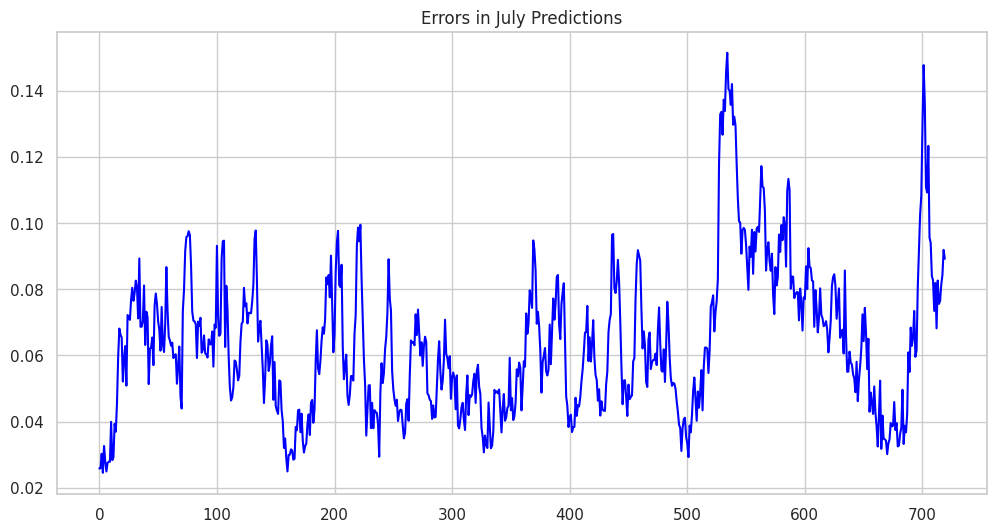

In [ ]:
errors = preds_july_np - true_july_np
error_mean = np.mean(errors, axis=0)
error_std = np.std(errors, axis=0)
abs_errors = np.abs(errors)
abs_error_mean = np.mean(abs_errors, axis=0)
abs_error_std = np.std(abs_errors, axis=0)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(abs_error_mean, label='Mean Error', color='blue')
# plt.fill_between(range(len(abs_error_mean)), abs_error_mean - abs_error_std, abs_error_mean + abs_error_std, color='blue', alpha=0.2)
plt.title('Errors in July Predictions')


In [ ]:
preds_august_np = preds_august_np.T

In [ ]:
pd.DataFrame(preds_august_np).to_csv('predictions/august_predictions.csv', index=False)